Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers, initializers
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
# Global randoms
tf.random.set_seed(42)
np.random.seed(42)

# Usunięcie kolumn o najmniejszej korelcji z ceną

In [ ]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

In [ ]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

In [ ]:
data_ALL.info()

In [ ]:
data_ALL.corr()["price"]

In [ ]:
data_ALL.drop(columns=['floor', 'floorCount', 'latitude', 'longitude', 'poiCount', 'hasBalcony', 'offerMonth'], inplace=True)

# Model

In [8]:
def create_model(input_size):
    model = models.Sequential(
    [
        layers.InputLayer(input_shape=input_size),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_squared_error',
        metrics=['mean_absolute_percentage_error', 'mean_absolute_error', 'logcosh'])
    return model

In [ ]:
features = data_ALL
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

In [ ]:
kfold = KFold(n_splits=10)
fold_no = 1
for train, test in kfold.split(features, labels):
    model = create_model(25)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 100)
    #model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1

# Trenowanie sieci na danych zawierających outlayery

In [3]:
data_ALL_outlayers = pd.read_csv("data_ALL_outlayers.csv")
data_ALL_outlayers.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL_outlayers

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,63.00,3.00,4.00,10.00,1980.00,53.38,14.63,6.53,9.00,1,...,0,0,0,0,0,0,0,1,0,0
1,36.00,2.00,8.00,10.00,1990.00,53.44,14.56,2.15,16.00,0,...,0,0,0,0,0,0,0,1,0,0
2,73.02,3.00,2.00,3.00,1990.00,53.45,14.55,3.24,9.00,0,...,0,0,0,0,0,0,0,1,0,0
3,87.60,3.00,2.00,3.00,1990.00,53.44,14.53,2.27,32.00,1,...,0,0,0,0,0,0,0,1,0,0
4,66.00,3.00,1.00,3.00,1990.00,53.41,14.50,4.07,1.00,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51309,50.12,2.00,1.00,1.00,1992.00,53.13,18.00,0.88,42.00,1,...,0,0,0,0,0,0,0,0,0,0
51310,100.00,4.00,3.00,4.00,1910.00,53.13,18.01,0.65,54.00,1,...,0,0,0,0,0,0,0,0,0,0
51311,59.10,2.00,1.00,1.00,1910.00,53.13,18.01,0.65,54.00,1,...,0,0,0,0,0,0,0,0,0,0
51312,81.07,5.00,1.00,4.00,2019.00,53.12,17.96,3.04,9.00,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features = data_ALL_outlayers
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
1444/1444 [==============================] - 9s 5ms/step - loss: 89220079616.0000 - mean_absolute_percentage_error: 35.0917 - mean_absolute_error: 214962.4375 - logcosh: 214961.6562
Epoch 2/100
1444/1444 [==============================] - 8s 6ms/step - loss: 49229860864.0000 - mean_absolute_percentage_error: 23.7041 - mean_absolute_error: 158567.3438 - logcosh: 158566.7656
Epoch 3/100
1444/1444 [==============================] - 8s 5ms/step - loss: 35986796544.0000 - mean_absolute_percentage_error: 19.3905 - mean_absolute_error: 133762.5625 - logcosh: 133761.9062
Epoch 4/100
1444/1444 [==============================] - 8s 5ms/step - loss: 31455506432.0000 - mean_absolute_percentage_error: 17.9226 - mean_absolute_error: 124938.3516 - logcosh: 124937.6562
Epoch 5/100
1444/1444 [==============================] - 8s 5ms/step - loss: 30032584704.0000 - mean_absolute_percentage_error:

1444/1444 [==============================] - 8s 6ms/step - loss: 24873705472.0000 - mean_absolute_percentage_error: 15.4407 - mean_absolute_error: 109781.4062 - logcosh: 109780.7422
Epoch 43/100
1444/1444 [==============================] - 9s 6ms/step - loss: 25178873856.0000 - mean_absolute_percentage_error: 15.5000 - mean_absolute_error: 110311.8125 - logcosh: 110311.1250
Epoch 44/100
1444/1444 [==============================] - 9s 6ms/step - loss: 25192939520.0000 - mean_absolute_percentage_error: 15.5907 - mean_absolute_error: 110641.8047 - logcosh: 110641.1250
Epoch 45/100
1444/1444 [==============================] - 10s 7ms/step - loss: 25239439360.0000 - mean_absolute_percentage_error: 15.4819 - mean_absolute_error: 110219.2812 - logcosh: 110218.6406
Epoch 46/100
1444/1444 [==============================] - 9s 6ms/step - loss: 24766824448.0000 - mean_absolute_percentage_error: 15.3457 - mean_absolute_error: 109325.8125 - logcosh: 109325.1484
Epoch 47/100
1444/1444 [=============

1444/1444 [==============================] - 7s 5ms/step - loss: 23633483776.0000 - mean_absolute_percentage_error: 14.9311 - mean_absolute_error: 106383.0703 - logcosh: 106382.3984
Epoch 85/100
1444/1444 [==============================] - 7s 5ms/step - loss: 23463501824.0000 - mean_absolute_percentage_error: 14.8777 - mean_absolute_error: 106042.1719 - logcosh: 106041.4766
Epoch 86/100
1444/1444 [==============================] - 7s 5ms/step - loss: 23516166144.0000 - mean_absolute_percentage_error: 14.9356 - mean_absolute_error: 106416.7188 - logcosh: 106416.0078
Epoch 87/100
1444/1444 [==============================] - 7s 5ms/step - loss: 23328923648.0000 - mean_absolute_percentage_error: 14.8171 - mean_absolute_error: 105647.0000 - logcosh: 105646.3906
Epoch 88/100
1444/1444 [==============================] - 7s 5ms/step - loss: 23465275392.0000 - mean_absolute_percentage_error: 14.9568 - mean_absolute_error: 106391.4453 - logcosh: 106390.7969
Epoch 89/100
1444/1444 [==============

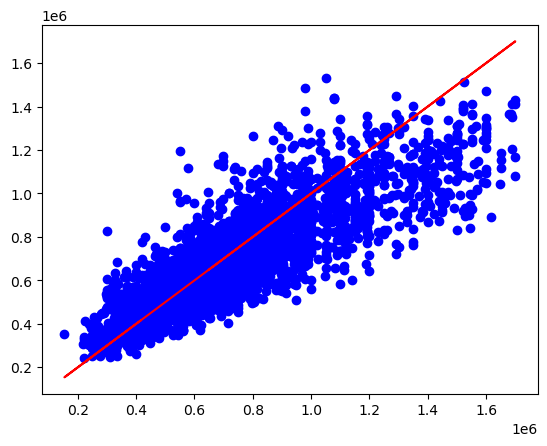

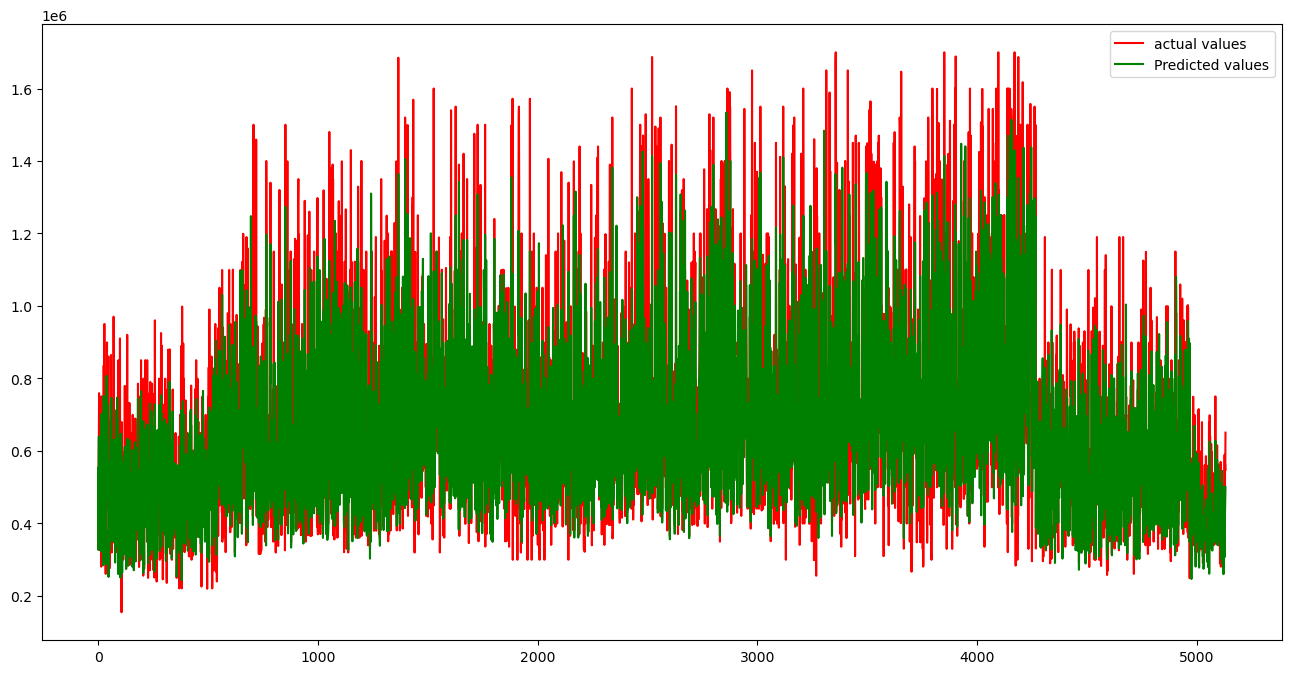

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
1444/1444 [==============================] - 8s 5ms/step - loss: 90956767232.0000 - mean_absolute_percentage_error: 34.9364 - mean_absolute_error: 216727.3281 - logcosh: 216726.7031
Epoch 2/100
1444/1444 [==============================] - 7s 5ms/step - loss: 49368203264.0000 - mean_absolute_percentage_error: 23.5226 - mean_absolute_error: 158822.8906 - logcosh: 158822.2812
Epoch 3/100
1444/1444 [==============================] - 7s 5ms/step - loss: 36807729152.0000 - mean_absolute_percentage_error: 19.5575 - mean_absolute_error: 135732.4219 - logcosh: 135731.7188
Epoch 4/100
1444/1444 [==============================] - 7s 5ms/step - loss: 31640700928.0000 - mean_absolute_percentage_error: 17.9040 - mean_absolute_error: 125548.1406 - logcosh: 125547.3984
Epoch 5/100
1444/1444 [==============================] - 7s 5ms/step - loss: 30610055168.0000 - mean_absolute_percentage_error:

KeyboardInterrupt: 

In [9]:
kfold = KFold(n_splits=10)
fold_no = 1
for train, test in kfold.split(features, labels):
    model = create_model(32)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 100)
    #model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1